In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in data
df = pd.read_csv('https://gist.githubusercontent.com/villrv/e41f634963f86d617c25cea3a8f32776/raw/9e6f23b626fe9653e61a5239dbd4f6cf6ce494ea/SchaeferSDSSLineData.txt',sep=' ')



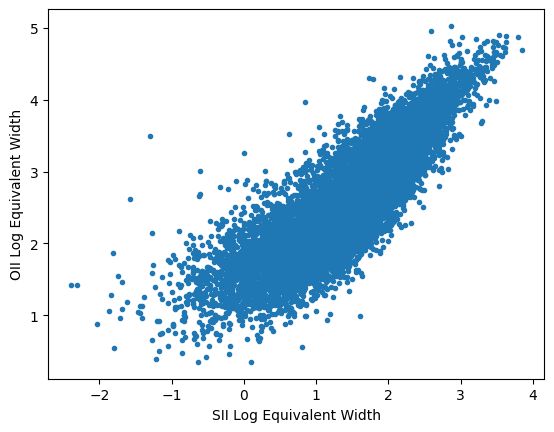

In [2]:
plt.plot(df['SII'],df['OII'],'.')
plt.xlabel('SII Log Equivalent Width')
plt.ylabel('OII Log Equivalent Width')

plt.show()

Coefficient of Determination:  0.7166922366460435


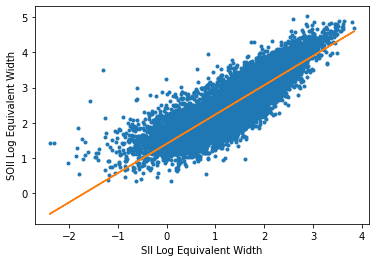

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

reg = LinearRegression().fit(df['SII'].values.reshape(-1,1),df['OII'])
print('Coefficient of Determination: ',reg.score(df['SII'].values.reshape(-1,1), df['OII']))
predicted_oii = reg.predict(df['SII'].values.reshape(-1,1))


plt.plot(df['SII'],df['OII'],'.')
plt.plot(df['SII'], predicted_oii)
plt.xlabel('SII Log Equivalent Width')
plt.ylabel('SOII Log Equivalent Width')

plt.show()

Coefficient of Determination:  0.748190293587391


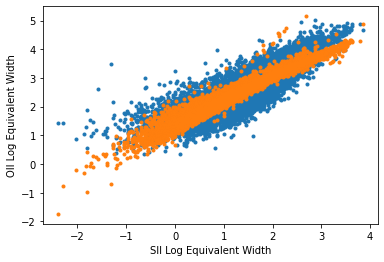

In [ ]:

reg = LinearRegression().fit(df[['SII','Halpha','Hbeta']],df['OII'])
print('Coefficient of Determination: ',reg.score(df[['SII','Halpha','Hbeta']], df['OII']))
predicted_oii = reg.predict(df[['SII','Halpha','Hbeta']])


plt.plot(df['SII'],df['OII'],'.')
plt.plot(df['SII'], predicted_oii,'.')
plt.xlabel('SII Log Equivalent Width')
plt.ylabel('OII Log Equivalent Width')

plt.show()

Coefficient of Determination:  0.748190293587391


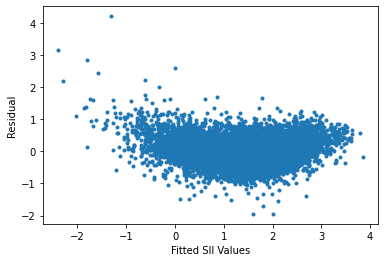

In [ ]:

reg = LinearRegression().fit(df[['SII','Halpha','Hbeta']],df['OII'])
print('Coefficient of Determination: ',reg.score(df[['SII','Halpha','Hbeta']], df['OII']))
predicted_oii = reg.predict(df[['SII','Halpha','Hbeta']])

residuals = df['OII'] - predicted_oii

plt.plot(df['SII'], residuals,'.')
plt.xlabel('Fitted SII Values')
plt.ylabel('Residual')

plt.show()

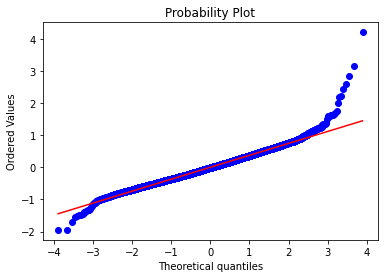

In [ ]:
import scipy.stats as stats
res = stats.probplot(residuals, dist="norm",plot=plt)
plt.show()

In [ ]:
!pip install loess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for loess: filename=loess-2.1.2-py3-none-any.whl size=18782 sha256=3eedabac956edfdfe2e3434d0e5ead49f6fee47f3cb0fb41ebc882613041c112
  Stored in directory: /root/.cache/pip/wheels/40/76/ad/76889591a81adb6c383df0d4f1dc3e5ac0151ec91d6a20c109
  Created wheel for plotbin: filename=plotbin-3.1.3-py3-none-any.whl size=12841 sha256=59d4825dbd28073cbf55d0d8fedb0b319f608ceca9acce12526b79c2cc8e63e0
  Stored in directory: /root/.cache/pip/wheels/1a/2b/68/a29eaeeecebea783c9ab4c892083065486b963bf3c6bb1e060
Successfully built loess plotbin


In [ ]:
from loess.loess_1d import loess_1d
xout, yout, wout = loess_1d(df['SII'].values, df['OII'].values, xnew=None, degree=1, frac=0.27,
                            npoints=None, rotate=False, sigy=None)

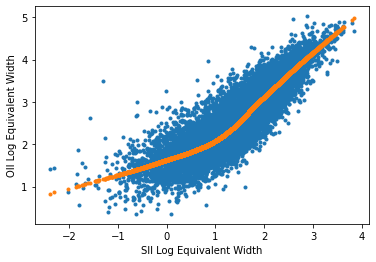

In [ ]:
plt.plot(df['SII'],df['OII'],'.')
plt.plot(df['SII'], yout,'.')
plt.xlabel('SII Log Equivalent Width')
plt.ylabel('OII Log Equivalent Width')

plt.show()

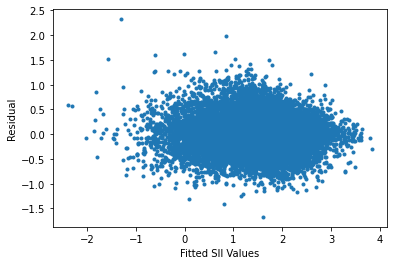

In [ ]:
residuals = df['OII'] - yout

plt.plot(df['SII'], residuals,'.')
plt.xlabel('Fitted SII Values')
plt.ylabel('Residual')

plt.show()

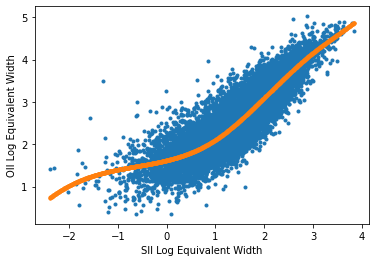

In [ ]:
from scipy import interpolate

gind = np.argsort(df['SII'].values)
X = df['SII'].values[gind]
y = df['OII'].values[gind]


tck = interpolate.splrep(X,y, t=[1,2,3])
new_x = np.linspace(np.min(X),np.max(X),1000)
new_y = interpolate.splev(new_x, tck, der=0)

plt.plot(df['SII'],df['OII'],'.')
plt.plot(new_x, new_y,'.')
plt.xlabel('SII Log Equivalent Width')
plt.ylabel('OII Log Equivalent Width')

plt.show()